<a href="https://colab.research.google.com/github/nrodas1999/X.C51/blob/main/pset3_SLGNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <center> Problem Set 3 <center>
<center> 3.C01/3.C51, 7.C01/7.C51, 10.C01/10.C51, 20.C01/20.C51<center>




<b>Name:</b>

<b>Kerberos id:</b>

# 1.0 Load relevant packages (~2 min)

Includes installations of relevant packages & mounting Google Drive.
A new window will pop up for you to authorize access to your Google Drive - please accept the two requests you will be presented with.


In [1]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.4.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 54.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')
mydrive = '/content/drive/MyDrive'

Mounted at /content/drive


In [3]:
pip install dgl -f https://data.dgl.ai/wheels/torch-2.4/cu124/repo.html

Looking in links: https://data.dgl.ai/wheels/torch-2.4/cu124/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.3/797.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176

In [4]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.4.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html


In [5]:
import os
from os.path import join
import sys
import random
from random import sample
import json
import io
import requests
import collections
from time import time
from code import interact
from traceback import print_tb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils import data
from torch.utils.data import Dataset, DataLoader, Subset
from torch_scatter import scatter_mean

import scipy.sparse as sp
from scipy.sparse import csr_matrix

import networkx as nx

import dgl
import dgl.function as fn
from dgl.nn import GATConv

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [6]:
#setting random see for reproducibility
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)

In [7]:
#check if GPU is actually available
torch.cuda.is_available()

True

#1.1 (5 points) Get Data to construct a Knowledge Graph (KG) (~20s)

**Run the code cells below and answer the following question.**

1. For each gene entity in the KG, 16 neighbors are being sampled in the code provided in the cells below (you should simply run them), which will be used during training. How could changing the number of sampled neighbors impact model performance?


In [8]:
torch.set_default_dtype(torch.float32)
NEIGHBOR_NUM = 16

In [9]:
class KGDataset(Dataset):
    def __init__(self):
        kg_dict = np.load('/content/drive/MyDrive/Colab Notebooks/X.C51:PSET 3/Data/kg_dict.npy', allow_pickle=True).item()
        hs = np.load('/content/drive/MyDrive/Colab Notebooks/X.C51:PSET 3/Data/hs.npy', allow_pickle=True)
        rs = np.load('/content/drive/MyDrive/Colab Notebooks/X.C51:PSET 3/Data/rs.npy', allow_pickle=True)
        ts = np.load('/content/drive/MyDrive/Colab Notebooks/X.C51:PSET 3/Data/ts.npy', allow_pickle=True)

        self.kg_dict = kg_dict
        self.heads = hs
        self.rels = rs
        self.tails = ts
        self.graph = None
        self.sampled_edges, self.sampled_rels, self.neighbor_num = self.get_Neighborhood()

    @property
    def entity_count(self):
        return max(max(self.tails), max(self.heads)) + 2

    @property
    def relation_count(self):
        return max(self.rels) + 2

    def __len__(self):
        return len(self.kg_dict)

    def __getitem__(self, index):
        head = self.heads[index]
        relation, pos_tail = random.choice(self.kg_dict[head])
        while True:
            neg_head = random.choice(self.heads)
            neg_tail = random.choice(self.kg_dict[neg_head])[1]
            if (relation, neg_tail) in self.kg_dict[head]:
                continue
            else:
                break
        return head, relation, pos_tail, neg_tail

    def get_Neighborhood(self):
        print('sampling neighborhood...')
        neighbor_num = NEIGHBOR_NUM
        edges = np.load('/content/drive/MyDrive/Colab Notebooks/X.C51:PSET 3/Data/sample_edges.npy', allow_pickle=True).item()
        rels = np.load('/content/drive/MyDrive/Colab Notebooks/X.C51:PSET 3/Data/sample_rels.npy', allow_pickle=True).item()
        print('successfully loaded...')
        return edges, rels, neighbor_num

In [10]:
kg_dataset = KGDataset()
heads = kg_dataset.heads   #head
relations = kg_dataset.rels    #relationship
tails = kg_dataset.tails   #tail

sampling neighborhood...


/usr/local/lib/python3.11/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


successfully loaded...




```
# Tiene formato de código
```
The number of neighboors sampled has to do with how much information we are gathering. Basically sets how much of the information around each node is considered as relevant. As always with ML it is important to balance between too much information and too little. Too many neighboors not only makes the performance slower but can cause more noise or overfitting relationships between genes. I looked this up is called Over-smoothing, basically nodes become very similar between one another. On the other hand you want to include enough neighboors to make relevant statements about the genes.

# 1.2 (5 points) Get Data to construct a SL graph & select gene pairs for training and validation (~5s)


**Run the code cells below and answer the following question. You will need to write some lines of code to answer Q1.**

1.   How many gene pairs are in the training and validation sets? How do these numbers compare to the total number of human genes included in the study (~10,000)? (5 points)

Since we are considering gene interactions we should compare to all the possible gene pairs, that's 10000 choose 2 in the order of 10^8. The training and validation datasets are some orders away. However considering the fact that not all genes interact is definitely a good size data set for this task.









In [11]:
class SLDataset(Dataset):
    def __init__(self, fold_n) -> None:
        super().__init__()
        print(f'loading sl dataset...')
        self.fold_n = fold_n
        self.sl_data = np.load('/content/drive/MyDrive/Colab Notebooks/X.C51:PSET 3/Data/sl2id.npy', allow_pickle=True)
        self.df = pd.DataFrame(self.sl_data, columns=['gene_a', 'gene_b', 'label'])
        self.df = self.df[self.df['label'] == 1][['gene_a', 'gene_b']]
        self.df_reverse = pd.DataFrame()
        self.df_reverse['gene_a'] = self.df['gene_b']
        self.df_reverse['gene_b'] = self.df['gene_a']
        self.df_dataset = pd.concat([self.df, self.df_reverse])
        self.reindex_dict = self.get_reindex_dict()
        self.an_reindex_dict = {y: x for x, y in self.reindex_dict.items()}
        self.train_df, self.val_df = self.get_df()
        self.train_a, self.train_b, self.train_label, self.val_a, self.val_b, self.val_label = self.get_data()
        self.SLGraph = self.getSLGraph()

    @property
    def n_gene(self):
        return max(self.reindex_dict.values()) + 1

    @property
    def trainDataSize(self):
        return len(self.train_a)

    @property
    def valDataSize(self):
        return len(self.val_a)

    def get_df(self):
        train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X.C51:PSET 3/Data/train.txt', sep='\t')
        val_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X.C51:PSET 3/Data/val.txt', sep='\t')
        train_df = self.reindex_sl(train_df)
        val_df = self.reindex_sl(val_df)
        return train_df, val_df

    def get_data(self):
        train_a = np.array(self.train_df['gene_a'])
        train_b = np.array(self.train_df['gene_b'])
        train_label = np.array(self.train_df['label'])
        val_a = np.array(self.val_df['gene_a'])
        val_b = np.array(self.val_df['gene_b'])
        val_label = np.array(self.val_df['label'])
        return train_a, train_b, train_label, val_a, val_b, val_label

    def getSLGraph(self):
        gene_a = np.array(self.train_df[self.train_df['label'] == 1]['gene_a'])
        gene_b = np.array(self.train_df[self.train_df['label'] == 1]['gene_b'])
        SLGraph = csr_matrix((np.ones(len(gene_a)), (gene_a, gene_b)), shape=(self.n_gene, self.n_gene))
        SLGraph += sp.eye(SLGraph.shape[0], format='csr')
        return SLGraph

    def getPosNeighbors(self, ids):
        posNeighbors = []
        for id in ids:
            posNeighbors.append(self.SLGraph[id].nonzero()[1])
        return posNeighbors

    def get_reindex_dict(self):
        df = self.df_dataset
        set_a = set(list(df['gene_a']))
        set_b = set(list(df['gene_b']))
        set_all = sorted(list(set_a | set_b))
        reindex_dict = dict()
        for i in range(len(set_all)):
            reindex_dict[set_all[i]] = i
        return reindex_dict

    def reindex_sl(self, df_for_reidx):
        reindex_dict = self.reindex_dict
        df = df_for_reidx.copy()
        df['gene_a'] = df['gene_a'].apply(lambda x: reindex_dict.get(x))
        df['gene_b'] = df['gene_b'].apply(lambda x: reindex_dict.get(x))
        return df


In [12]:
sl_dataset = SLDataset(fold_n=1) #just training model on 1 fold of data (no CV)

train_size = sl_dataset.trainDataSize
val_size = sl_dataset.valDataSize
n_gene = sl_dataset.n_gene

loading sl dataset...


Print the sizes of the training and validation datasets.




In [13]:
# in this line of code you should get size of the training set
print(f'train size: {train_size}')
# in this line of code you should get size of the validation set
print(f'val size: {val_size}')

print(f'genes: {n_gene}')

train size: 116487
val size: 14560
genes: 10004


# 1.3 (25 points) Construct SL graph (~5s)

**Run the code cells below and answer the following questions.**

1. What does the graph plotted below represent? What are its nodes and edges? (5 points)

This is the SL graph explained in the Pset. The pink dots represent the nodes and the grey vectors the edges.

2.  What are the key differences between applying dropout to nodes vs. edges during training, and how might each affect model learning and performance? (5 points)

Dropout randomly gets rid of nodes or edges respectively in each training iteration. For both nodes and edges we can expect that if the relevant ones get dropped out too often the model may lose information. Node dropout is useful if one wants a model that performs well in absence of data from specific genes. The model can learn specific features for the genes. On the other hand the dropout of edges avoids the model just learning specific relationships.

3.   What are the dimensions of the binary matrix and do they make sense to you? In the context of the problem, comment on patterns you see in the matrix, namely the almost perfect yet incomplete symmetry across the diagonal as well as the sparsity of the matrix. Does its diagonal look reasonable to you?  (10 points)

10004x10004 is the dimension of the binary matrix which makes sense becaus there are about 10000 total genes, however is best to plot only subsets because otherwise is hard to visualize.  The mirror image makes sense because the genes that are correlated should have cross peaks. The sparsity is because as mentioned before the total possible interactions are on the 10^8 and we only have 10^5 for the training data.To my understanding the diagonal should be empty because self correlation is not accounted  for. (Aii=0 for all i)

4. Considering what you have learned in class, comment on the benefits and dangers of sparsity in the context of GNNs applied to biological questions, namely in the context of predicting SL gene pairs. (5 points)

From a biological perspective it makes sense to have a more sparse sample size, I believe many interactions are not necessarily relevant and when the computing time is long is not worth having such huge demanding data sets. However as mentioned before, it is alway about finding a balance between too much on too little information included. One does not want to lose crucial information.

Text(0.5, 1.0, 'SL Graph')

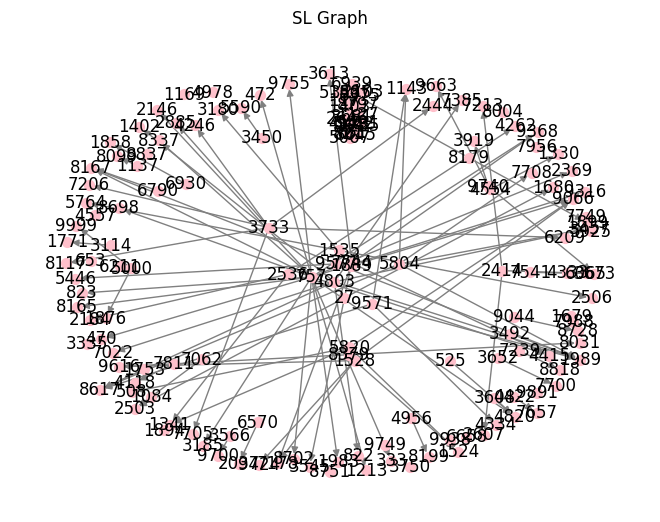

In [14]:
from scipy.sparse import find

sparse_matrix = sl_dataset.SLGraph
rows, cols, values = find(sparse_matrix)

subset_size = int(len(set(rows)) * 0.05)  # Plotting only a subset of genes for visual clarity
subset_rows = random.sample(sorted(set(rows)), subset_size)
subset_cols = random.sample(sorted(set(cols)), subset_size)

edges = [(row, col) for row, col in zip(rows, cols) if row in subset_rows and col in subset_cols]

G = nx.DiGraph()
G.add_edges_from(edges)
G.remove_edges_from(list(nx.selfloop_edges(G)))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='pink', edge_color='gray')

plt.title('SL Graph')

(10004, 10004)


Text(0, 0.5, 'Gene b')

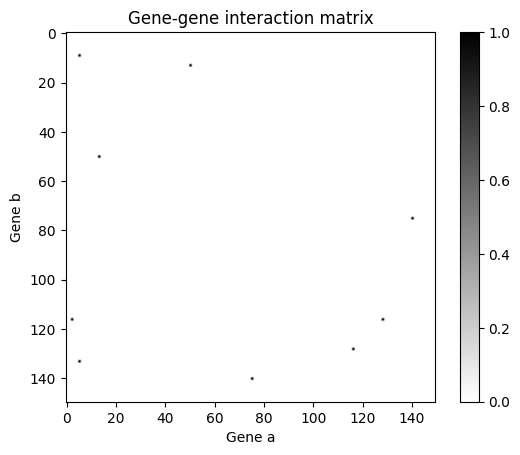

In [15]:
dense_matrix = sparse_matrix.toarray()
np.fill_diagonal(dense_matrix, 0)
binary_matrix = (dense_matrix != 0).astype(int)
print(binary_matrix.shape)
#plotting only some genes to better visualize patterns
#can play around with what genes are shown
plt.imshow(binary_matrix[1010:1160, 1010:1160], cmap='binary')
plt.colorbar()
plt.title('Gene-gene interaction matrix')
plt.xlabel('Gene a')
plt.ylabel('Gene b')

#1.4 (25 points) Load KG Data to Construct Knowledge Graph (~30s)

**Run the code cells below and answer the following question. You will need to write some lines of code to answer Q1.** (5 points)

1. How many nodes and edges does the KG have? And how many entities and relations are defined in the KG object? (5 points)

Number of entities in the KG: 54012
Number of relations in the KG: 24


2.   What does the boolean variable *inverse_r* mean? How does changing it from False to True change the appearance of the KG, and the total number of edges and nodes in the KG? (5 points)
This variable changes wether or not one wants to consider an inverse relation which basically means that if gene one is connected to gene 2 then 2 is also connected to gene 1, so the number of edges should double. This should ensure symmetry in the KG graph. From what I understand about SL there is a no directionality in the gene relationship so including the inverse relationship makes sense. It does increase the number of edges so it becomes more computationally challenging.

3. What is the rationale behind integrating these two graph types - SL graph and KG - and how might that improve model performance? Are there any downsides of weighting one type of graph more heavily relative to the other? (10 points)

SL has a more sparse set of information based directly on the synthetic lethality data. KG encompasses more relationships that can be based on relationships involving more complex biological pathways. Having both models complement each other provides a more accurate perspective since it confirms relationships and they can be used to build upon each other. With SL one can predict the genes that are related and KG can give information on why they are related.


In [16]:
def load_data(inverse_r):
    url = "https://github.com/zy972014452/SLGNN/raw/main/data/SL/raw/kg2id.txt"
    response = requests.get(url)
    content = response.text
    kg2id_np = np.loadtxt(content.splitlines(), dtype=np.int64)

    max = 0
    r_max = 0
    for i in range(len(kg2id_np)):
        h = kg2id_np[i][0]
        t = kg2id_np[i][2]
        r = kg2id_np[i][1]
        if h > max:
            max = h
        if t > max:
            max = t
        if r > r_max:
            r_max = r
    n_entities = max + 1
    n_relations = r_max + 1

    graph = nx.MultiDiGraph()
    for h, r, t in kg2id_np:
        graph.add_edge(h, t, key=r)
        if inverse_r == True:
            graph.add_edge(t, h, key=r + n_relations)

    return graph, n_entities, n_relations

In [17]:
inverse_r = True
#in this line of code, call the KG graph generated in the cell above
KG_graph, num_entities, num_relations = load_data(inverse_r)
#in this line of code, compute the number of entities in the graph
print(f"Number of entities:", num_entities)
#in this line of code, compute the number of relations in the graph
print(f"Number of relations:", num_relations)

Number of entities: 54012
Number of relations: 24


# 2. (5 points) Create Datasets and Dataloaders for Training & Validation (~1s)

**Run the code cells below and answer the following question.** You will need to write some lines of code to answer this question to create dataloaders for the training and validation datasets.


In [59]:
#Define Model Hyperparameters

class ArgsConfig:
    def __init__(self):

        #training parameters
        self.epoch = 10
        self.batch_size = 5000
        self.dim = 64
        self.lr = 3e-3

        #regularization parameters (prevent overfitting)
        self.l2 = 1e-4
        self.sim_regularity = 1e-3
        self.node_dropout = True
        self.node_dropout_rate = 0.5
        self.mess_dropout = True
        self.mess_dropout_rate = 0.1

        #other relevant parameters for the GNN
        self.context_hops = 3
        self.n_factors = 4
        self.ind = 'distance'

        self.cuda = True #Change depending on running on GPU/CPU
        self.gpu_id = 0
        self.fold_n = 1
        self.inverse_r = False


args_config = ArgsConfig()

In [60]:
class KGCNDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        gene_a = np.array(self.df.iloc[idx]['gene_a'])
        gene_b = np.array(self.df.iloc[idx]['gene_b'])
        label = np.array(self.df.iloc[idx]['label'], dtype=np.float32)
        return gene_a, gene_b, label

In [61]:
#in this line of code, call the training set defined in the KGCNDataset
train_dataset = KGCNDataset(sl_dataset.train_df)
#in this line of code create, create the DataLoader for the training set
train_loader = DataLoader(train_dataset, batch_size=args_config.batch_size, shuffle=True)
#in this line of code, call the validation set defined in the KGCNDataset
val_dataset = KGCNDataset(sl_dataset.val_df)
#in this line of code create, create the DataLoader for the validation set
val_loader = DataLoader(val_dataset, batch_size=args_config.batch_size, shuffle=False)

#2.1 Model Architecture (~10s)

**Note**:  Despite the extensive code shown below, you are not expected to understand every single line of it. The questions in each section are meant to guide your understanding of the code. Our emphasis is on your understanding of why and how GNNs are useful in the context of predicting SL.

-----

This model includes 3 classes: **Graph Attention Network (GAT) Class**, **Aggregator Class**, and **GraphConv Class**. The final model that calls all classes is named **SLModel.**

**Run the code cells below.**


#2.1.1 Graph Attention Network (GAT) Class

In [62]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [63]:
def distance_correlation(tensor_1, tensor_2):
    """
    Compute the distance correlation between two 1D tensors.
    Reference: https://en.wikipedia.org/wiki/Distance_correlation
    """
    channel = tensor_1.shape[0]
    device = tensor_1.device
    zeros = torch.zeros(channel, channel, device=device)
    zero = torch.zeros(1, device=device)

    tensor_1, tensor_2 = tensor_1.unsqueeze(-1), tensor_2.unsqueeze(-1)

    a_, b_ = torch.matmul(tensor_1, tensor_1.t()) * 2, torch.matmul(tensor_2, tensor_2.t()) * 2
    tensor_1_square, tensor_2_square = tensor_1**2, tensor_2**2

    a = torch.sqrt(torch.max(tensor_1_square - a_ + tensor_1_square.t(), zeros) + 1e-8)
    b = torch.sqrt(torch.max(tensor_2_square - b_ + tensor_2_square.t(), zeros) + 1e-8)

    A = a - a.mean(dim=0, keepdim=True) - a.mean(dim=1, keepdim=True) + a.mean()
    B = b - b.mean(dim=0, keepdim=True) - b.mean(dim=1, keepdim=True) + b.mean()

    dcov_AB = torch.sqrt(torch.max((A * B).sum() / channel**2, zero) + 1e-8)
    dcov_AA = torch.sqrt(torch.max((A * A).sum() / channel**2, zero) + 1e-8)
    dcov_BB = torch.sqrt(torch.max((B * B).sum() / channel**2, zero) + 1e-8)

    return dcov_AB / torch.sqrt(dcov_AA * dcov_BB + 1e-8)

In [64]:
class GAT(nn.Module):
    def __init__(self, num_layers, in_dim, num_hidden, num_classes, heads,
                 activation, feat_drop, attn_drop, negative_slope, residual):
        super(GAT, self).__init__()
        self.num_layers = num_layers
        self.activation = activation
        self.gat_layers = nn.ModuleList()

        # Input projection (no residual)
        self.gat_layers.append(
            GATConv(in_dim, num_hidden, heads[0], feat_drop, attn_drop,
                    negative_slope, False, activation))

        # Hidden layers
        for l in range(1, num_layers):
            self.gat_layers.append(
                GATConv(num_hidden * heads[l - 1], num_hidden, heads[l],
                        feat_drop, attn_drop, negative_slope, residual,
                        activation))

        # Output projection
        self.gat_layers.append(
            GATConv(num_hidden * heads[-2], num_classes, heads[-1], feat_drop,
                    attn_drop, negative_slope, residual, None))

    def forward(self, g, inputs):
        h = inputs
        for l in range(self.num_layers):
            h = self.gat_layers[l](g, h).flatten(1)
        return self.gat_layers[-1](g, h).mean(1)

#2.1.2  Aggregator Class




In [65]:
class Aggregator(nn.Module):
    """
    Relational Path-aware Convolution Network
    """
    def __init__(self, n_genes, n_factors, reindex_dict):
        super(Aggregator, self).__init__()
        self.n_genes = n_genes
        self.n_factors = n_factors
        self.reindex_dict = reindex_dict

    def forward(self, GATConv, sl_graph, entity_emb, gene_sl_emb, latent_emb,
                edge_index, edge_type, interact_mat, weight, disen_weight_att):

        n_entities = entity_emb.shape[0]
        channel = entity_emb.shape[1]

        # KG aggregate
        head, tail = edge_index
        edge_relation_emb = weight[edge_type]
        neigh_relation_emb = entity_emb[tail] * edge_relation_emb
        entity_agg = scatter_mean(neigh_relation_emb, index=head, dim=0, dim_size=n_entities)

        latent_emb = torch.mm(F.softmax(disen_weight_att, dim=-1), weight)
        score_ = torch.mm(gene_sl_emb, latent_emb.t())
        score = F.softmax(score_, dim=1).unsqueeze(-1)

        reidx = torch.tensor([self.reindex_dict[i] for i in range(self.n_genes)])
        gene_agg = torch.sparse.mm(interact_mat, entity_emb[reidx])
        input_emb = entity_agg[reidx]

        output_sl = []
        for i in range(self.n_factors):
            output_emb = GATConv[i](sl_graph, input_emb)
            output_sl.append(output_emb * latent_emb[i])

        output_sl = torch.stack(output_sl).permute(1, 0, 2)
        disen_weight = torch.mm(F.softmax(disen_weight_att, dim=-1), weight)
        disen_weight = disen_weight.expand(self.n_genes, self.n_factors, channel)

        gene_return = gene_agg + (output_sl * score).sum(dim=1)
        return entity_agg, gene_return, output_sl

#2.1.3 GraphConv Class


In [66]:
class GraphConv(nn.Module):
    def __init__(self,
                 channel,
                 n_hops,
                 n_genes,
                 n_factors,
                 n_relations,
                 interact_mat,
                 ind,
                 reindex_dict,
                 node_dropout_rate=0.5,
                 mess_dropout_rate=0.1):
        super(GraphConv, self).__init__()
        self.GATConv = nn.ModuleList([
            GAT(1, channel, channel, channel, [8, 8], F.leaky_relu, 0.2, 0.2, 0.2, True)
            for _ in range(n_factors)
        ])

        self.interact_mat = interact_mat
        self.sl_graph = self.get_sl_graph()
        self.n_genes = n_genes
        self.n_factors = n_factors
        self.n_relations = n_relations
        self.reindex_dict = reindex_dict
        self.ind = ind
        self.node_dropout_rate = node_dropout_rate
        self.mess_dropout_rate = mess_dropout_rate

        self.weight = nn.Parameter(nn.init.xavier_uniform_(torch.empty(n_relations, channel)))
        self.disen_weight_att = nn.Parameter(nn.init.xavier_uniform_(torch.empty(n_factors, n_relations)))

        self.convs = nn.ModuleList([
            Aggregator(n_genes, n_factors, reindex_dict)
            for _ in range(n_hops)
        ])

        self.dropout = nn.Dropout(p=mess_dropout_rate)
        self.temperature = 0.2

    def get_sl_graph(self):
        indices = self.interact_mat._indices()
        g = dgl.graph((indices[0], indices[1]))
        return g.to(device)

    def _edge_sampling(self, edge_index, edge_type, rate=0.5):
        n_edges = edge_index.shape[1]
        idx = np.random.choice(n_edges, size=int(n_edges * rate), replace=False)
        return edge_index[:, idx], edge_type[idx]

    def _sparse_dropout(self, x, rate=0.5):
        noise_shape = x._nnz()
        random_tensor = rate + torch.rand(noise_shape, device=x.device)
        dropout_mask = torch.floor(random_tensor).bool()
        i = x._indices()[:, dropout_mask]
        v = x._values()[dropout_mask]
        return torch.sparse.FloatTensor(i, v, x.shape).to(x.device) * (1. / (1 - rate))

    def _cul_cor(self):
        def cosine_similarity(t1, t2):
            norm1 = t1 / t1.norm(dim=0, keepdim=True)
            norm2 = t2 / t2.norm(dim=0, keepdim=True)
            return (norm1 * norm2).sum(dim=0).pow(2)

        def mutual_information():
            T = self.disen_weight_att.t()
            T_norm = T / T.norm(dim=1, keepdim=True)
            pos_scores = torch.exp((T_norm * T_norm).sum(dim=1) / self.temperature)
            ttl_scores = torch.exp(torch.mm(T, self.disen_weight_att).sum(dim=1) / self.temperature)
            return -torch.sum(torch.log(pos_scores / ttl_scores))

        if self.ind == 'mi':
            return mutual_information()
        else:
            cor = 0
            for i in range(self.n_factors):
                for j in range(i + 1, self.n_factors):
                    if self.ind == 'distance':
                        cor += distance_correlation(self.disen_weight_att[i], self.disen_weight_att[j])
                    else:
                        cor += cosine_similarity(self.disen_weight_att[i], self.disen_weight_att[j])
            return cor

    def forward(self, gene_emb, entity_emb, latent_emb,
                edge_index, edge_type, interact_mat,
                mess_dropout=True, node_dropout=False):
        if node_dropout:
            edge_index, edge_type = self._edge_sampling(edge_index, edge_type, self.node_dropout_rate)
            interact_mat = self._sparse_dropout(interact_mat, self.node_dropout_rate)

        entity_res_emb = entity_emb
        gene_res_emb = gene_emb
        cor = self._cul_cor()
        for_reg = None

        for i, conv in enumerate(self.convs):
            entity_emb, gene_emb, output_gene = conv(
                self.GATConv, self.sl_graph, entity_emb, gene_emb, latent_emb,
                edge_index, edge_type, interact_mat, self.weight, self.disen_weight_att)

            if mess_dropout:
                entity_emb = self.dropout(entity_emb)
                gene_emb = self.dropout(gene_emb)

            entity_emb = F.normalize(entity_emb)
            gene_emb = F.normalize(gene_emb)

            entity_res_emb = entity_res_emb + entity_emb
            gene_res_emb = gene_res_emb + gene_emb

            mean_reg = output_gene.mean(dim=0)
            for_reg = mean_reg if for_reg is None else for_reg + mean_reg

        cor_2 = 0
        for i in range(self.n_factors):
            for j in range(i + 1, self.n_factors):
                cor_2 += distance_correlation(for_reg[i], for_reg[j])

        return entity_res_emb, gene_res_emb, cor, cor_2

#2.2 (10 points) Define SLModel

**Run the code cells below. You will need to write some lines of code to answer this question.**

Instantiate the model, load the model on the GPU, and define the appropriate loss function and Adam optimizer with the model parameters and learning rate.


In [67]:
import torch
import torch.nn as nn
import numpy as np

class SLModel(nn.Module):
    def __init__(self, n_genes, n_relations, n_entities, args_config, kg, sl_adj, reindex_dict):
        super(SLModel, self).__init__()
        self.n_genes = n_genes
        self.n_relations = n_relations
        self.n_entities = n_entities
        self.reindex_dict = {y: x for x, y in reindex_dict.items()}
        self.decay = args_config.l2
        self.sim_decay = args_config.sim_regularity
        self.emb_size = args_config.dim
        self.context_hops = args_config.context_hops
        self.n_factors = args_config.n_factors
        self.node_dropout = args_config.node_dropout
        self.node_dropout_rate = args_config.node_dropout_rate
        self.mess_dropout = args_config.mess_dropout
        self.mess_dropout_rate = args_config.mess_dropout_rate
        self.ind = args_config.ind
        self.device = torch.device(f"cuda:{args_config.gpu_id}" if args_config.cuda else "cpu")
        self.sl_adj = sl_adj
        self.kg = kg

        # Edge index and type for the knowledge graph
        self.edge_index, self.edge_type = self._get_edges(kg)

        # Initialize weights and GCN
        self._init_weight()
        self.all_embed = nn.Parameter(self.all_embed)
        self.latent_emb = nn.Parameter(self.latent_emb)
        self.gcn = self._init_model()

    def _init_weight(self):
        initializer = nn.init.xavier_uniform_
        self.all_embed = initializer(torch.empty(self.n_genes + self.n_entities, self.emb_size))
        self.latent_emb = initializer(torch.empty(self.n_factors, self.emb_size))
        self.interact_mat = self._convert_sp_mat_to_sp_tensor(self.sl_adj).to(self.device)

    def _init_model(self):
        return GraphConv(
            channel=self.emb_size,
            n_hops=self.context_hops,
            n_genes=self.n_genes,
            n_relations=self.n_relations,
            n_factors=self.n_factors,
            interact_mat=self.interact_mat,
            ind=self.ind,
            reindex_dict=self.reindex_dict,
            node_dropout_rate=self.node_dropout_rate,
            mess_dropout_rate=self.mess_dropout_rate
        )

    def _convert_sp_mat_to_sp_tensor(self, X):
        coo = X.tocoo()
        indices = torch.LongTensor(np.vstack((coo.row, coo.col)))
        values = torch.FloatTensor(coo.data)
        return torch.sparse.FloatTensor(indices, values, coo.shape)

    def _get_edges(self, graph):
        graph_tensor = torch.tensor(list(graph.edges))
        edge_index = graph_tensor[:, :-1].t().long().to(self.device)
        edge_type = graph_tensor[:, -1].long().to(self.device)
        return edge_index, edge_type

    def forward(self, gene_a, gene_b):
        gene_emb = self.all_embed[:self.n_genes]
        item_emb = self.all_embed[self.n_genes:]

        entity_gcn_emb, gene_gcn_emb, cor, cor_2 = self.gcn(
            gene_emb,
            item_emb,
            self.latent_emb,
            self.edge_index,
            self.edge_type,
            self.interact_mat,
            mess_dropout=self.mess_dropout,
            node_dropout=self.node_dropout
        )

        e_u = gene_gcn_emb[gene_a]

        reindexed = torch.tensor([self.reindex_dict[int(b)] for b in gene_b], device=self.device)
        e_e = entity_gcn_emb[reindexed]

        scores = (e_u * e_e).sum(dim=1)
        regularizer = (e_u.norm(2) ** 2 + e_e.norm(2) ** 2) / 2
        emb_loss = self.decay * regularizer / len(gene_a)
        cor_loss = self.sim_decay * (cor + cor_2)

        return torch.sigmoid(scores), emb_loss, cor_loss, cor

    def generate(self):
        gene_emb = self.all_embed[:self.n_genes]
        item_emb = self.all_embed[self.n_genes:]
        return self.gcn(
            gene_emb,
            item_emb,
            self.latent_emb,
            self.edge_index,
            self.edge_type,
            self.interact_mat,
            mess_dropout=False,
            node_dropout=False
        )[:-1]

    def rating(self, u_g_embeddings, i_g_embeddings):
        return torch.matmul(u_g_embeddings, i_g_embeddings.t())

    def create_bpr_loss(self, genes, pos_items, neg_items, cor):
        batch_size = genes.size(0)
        pos_scores = torch.sum(genes * pos_items, dim=1)
        neg_scores = torch.sum(genes * neg_items, dim=1)

        mf_loss = -torch.mean(nn.LogSigmoid()(pos_scores - neg_scores))

        regularizer = (genes.norm(2) ** 2 + pos_items.norm(2) ** 2 + neg_items.norm(2) ** 2) / 2
        emb_loss = self.decay * regularizer / batch_size
        cor_loss = self.sim_decay * cor

        return mf_loss + emb_loss + cor_loss, mf_loss, emb_loss, cor

In [68]:
#this line of code should instantiate the model
model = SLModel(
        n_genes= 10004,
        n_relations= 2*num_relations,
        n_entities=num_entities,
        args_config=args_config,
        kg=KG_graph,
        sl_adj=sl_dataset.SLGraph,
        reindex_dict=sl_dataset.reindex_dict )
#this line of code should move the model to the relevant device (GPU)
model = model.to(device)
#this line of code should device the appropriate loss to be minimized during training
criterion = nn.BCELoss() #loss sugeste by AI code suggestions
#this line of code should define the optimization parameters (use Adam optimizer)
optimizer = torch.optim.Adam(model.parameters(), lr=args_config.lr)

# 2.3 (10 points) Train & Evaluate Model (~8min if using A100)

Complete the loop shown below to train and evaluate the model. Compute the performance metrics using scikitlearn

In [69]:
#my training is taking forever, 18 min for 26 epochs, saw someone with a similar problem on piazza. Instructor suggested to only do a few epochs, I will do 10.

training_loss_list, val_loss_list = [], []
auc_list, f1_list, precision_list, recall_list = [], [], [], []

for epoch in range(args_config.epoch):
    labels_train = torch.tensor([]).to(device)
    logits_train = torch.tensor([]).to(device)

    training_loss = 0

    model.train()

    for i, (gene_a, gene_b, labels) in enumerate(train_loader):
        gene_a = gene_a.to(device)
        gene_b = gene_b.to(device)
        labels = labels.to(device)

        ########## TODO ##########

        # Forward pass: pass gene_a and gene_b through the model
        # Get logits, emb_loss, cor_loss, _
        logits, emb_loss, cor_loss, _ = model(gene_a, gene_b)
        # Compute the total loss using the criterion + emb_loss + cor_loss
        loss = criterion(logits.squeeze(), labels) + emb_loss + cor_loss
        # Backward pass: zero grad, loss backward, optimizer step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Accumulate training loss
        training_loss += loss.item()*gene_a.size(0)
        labels_train = torch.cat((labels_train, labels), dim=0)
        logits_train = torch.cat((logits_train, logits.detach()), dim=0)
        ########## TODO ##########

    training_loss = training_loss / len(train_loader)
    training_loss_list.append(training_loss)
    print(f"[Epoch {epoch}] Training Loss: {training_loss:.4f}")



    # ******** Validation set (we are now in evaluation mode) ********

    model.eval()
    with torch.no_grad():

        labels_val = torch.tensor([]).to(device)
        logits_val = torch.tensor([]).to(device)
        val_loss = 0

        for i, (gene_a, gene_b, labels) in enumerate(val_loader):
            gene_a = gene_a.to(device)
            gene_b = gene_b.to(device)
            labels = labels.to(device)

        ########## TODO ##########

            # Forward pass: model returns logits, emb_loss, cor_loss, _
            logits, emb_loss, cor_loss, _ = model(gene_a, gene_b)
            # Compute the total loss
            loss = criterion(logits.squeeze(), labels) + emb_loss + cor_loss
            # Accumulate validation loss
            val_loss += loss.item()*gene_a.size(0)
            labels_val = torch.cat((labels_val, labels), dim=0)
            logits_val = torch.cat((logits_val, logits), dim=0)
        # Average validation loss for the epoch
        val_loss = val_loss / len(val_loader)
        val_loss_list.append(val_loss)
        print(f"[Epoch {epoch}] Validation Loss: {val_loss:.4f}")

        # Compute metrics Honestly this was done with AI, because at this point I am a bit exhausted
        probabilities = torch.sigmoid(logits_val).cpu().numpy()
        predictions = (probabilities > 0.5).astype(int)
        ground_truth = labels_val.cpu().numpy().astype(int)

        auc = roc_auc_score(ground_truth, probabilities)
        f1 = f1_score(ground_truth, predictions)

        auc_list.append(auc)
        f1_list.append(f1)
      ########## TODO ##########

[Epoch 0] Training Loss: 2552.9861
[Epoch 0] Validation Loss: 2196.3336
[Epoch 1] Training Loss: 1783.4818
[Epoch 1] Validation Loss: 1872.7380
[Epoch 2] Training Loss: 1373.4274
[Epoch 2] Validation Loss: 1620.8178
[Epoch 3] Training Loss: 1080.3033
[Epoch 3] Validation Loss: 1529.4562
[Epoch 4] Training Loss: 916.9384
[Epoch 4] Validation Loss: 1448.0218
[Epoch 5] Training Loss: 797.8396
[Epoch 5] Validation Loss: 1456.9254
[Epoch 6] Training Loss: 704.6659
[Epoch 6] Validation Loss: 1362.8862
[Epoch 7] Training Loss: 630.9705
[Epoch 7] Validation Loss: 1369.4041
[Epoch 8] Training Loss: 570.4504
[Epoch 8] Validation Loss: 1365.7273
[Epoch 9] Training Loss: 515.1869
[Epoch 9] Validation Loss: 1349.1551


#2.4 (5 points) Plot Results (~1 min)

**You will need to write some lines of code to answer these questions.**

1.   Plot the training and validation losses across epochs.

2.   Plot the performance metrics computed in the validation loop, including the Area under the Curve (AUC) and F1 score across epochs, and Precision vs Recall plots. (1.5 point)

3. Considering these plots, comment on model performance.




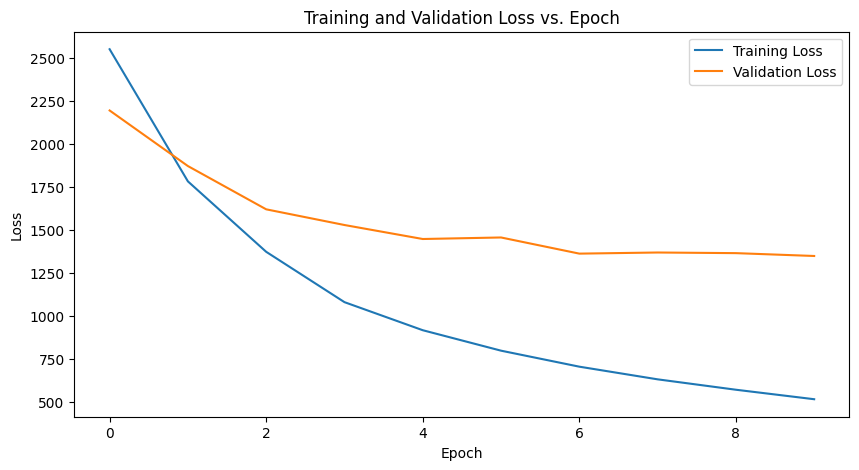

In [70]:
plt.figure(figsize=(10, 5))
#in this line of code, plot the training loss across epochs
plt.plot(training_loss_list, label='Training Loss')
#in this line of code, plot the validation loss across epochs
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.show()


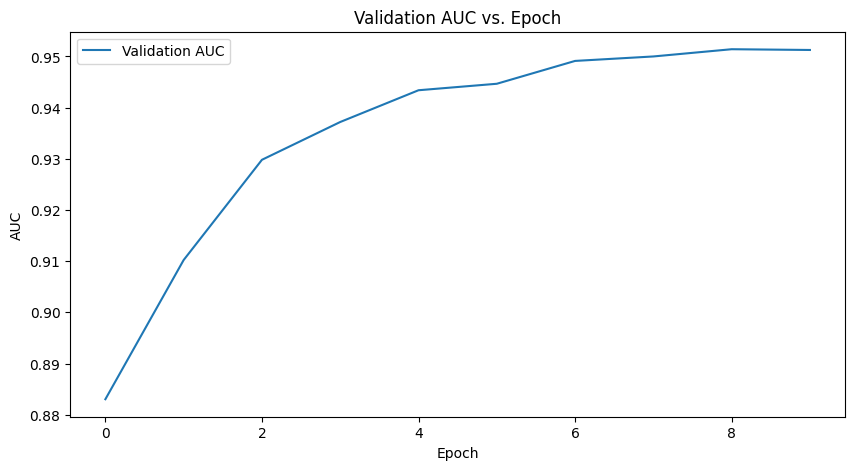

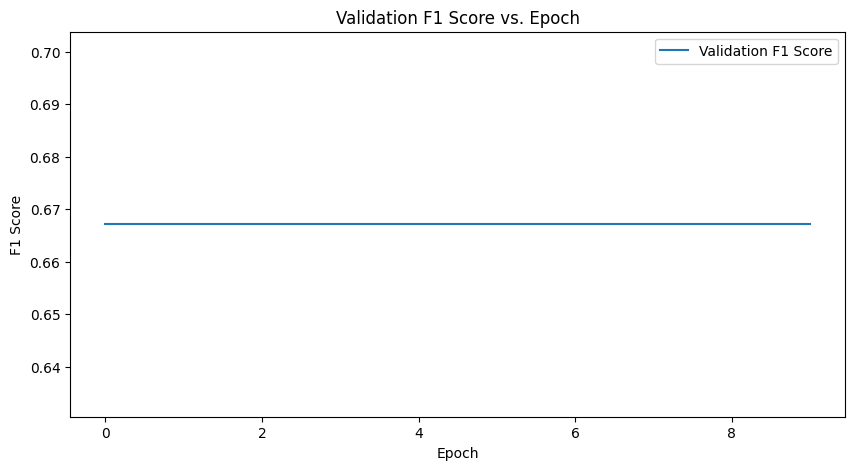

In [72]:
#in this line of code, plot the AUC across epochs
plt.figure(figsize=(10, 5))
plt.plot(auc_list, label='Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Validation AUC vs. Epoch')
plt.legend()
plt.show()
#in this line of code, plot the F1 score across epochs
plt.figure(figsize=(10, 5))
plt.plot(f1_list, label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Validation F1 Score vs. Epoch')
plt.legend()
plt.show()

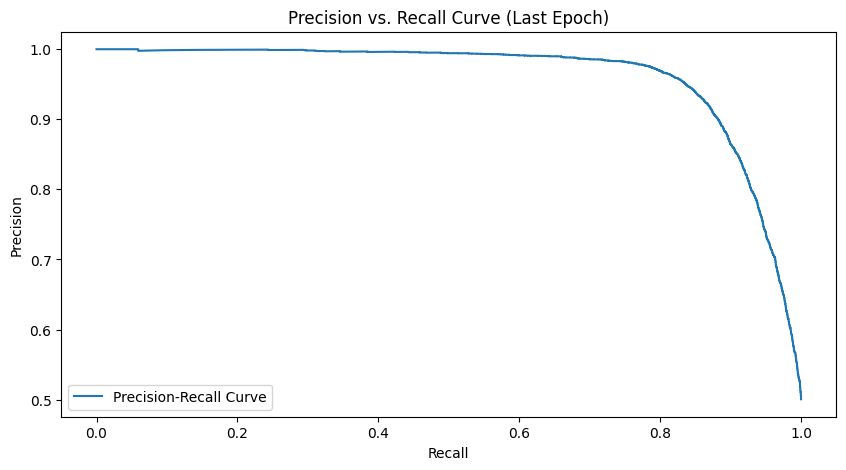

In [73]:
#in this line of code, plot Precision vs. Recall
plt.figure(figsize=(10, 5))
precision, recall, _ = precision_recall_curve(ground_truth, probabilities)  # Assuming ground_truth and probabilities are available
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall Curve (Last Epoch)')
plt.legend()
plt.show()

The loss plot shows that the model is learning, however I don't knoe how good it is that the plateau from validation is so much higher than the training, is my model overfitting? I think the AUC is looking really good, the model is good at classifying. The very high platteau at then could be realated to the platteau of the validation loss. I don't know what is wrong with my F1 :(
The precission vs recall plot is very insightfull of the trade off one has to always think about in ML, high precission vs low recall or viceversa. I believe it is too steep toward the end.

# 3. (10 points) Investigating one SL gene pair of interest

**This question requires no coding, just answer it in a markdown cell below.**

1. Look up the entry for HOXC11 in the [SynLethDB Database](https://synlethdb.sist.shanghaitech.edu.cn/#/search) -  what SL interactions does it establish with other genes? Would you expect KRAS inhibitors to be particularly effective in cancer cells bearing loss of function mutations in HOXC11? Explain your answer. (3 points)


in order:
KRAS,HRAS,NRAS,VCPIP1,ZNF347,FMO4,NPBWR2,NF568,NCOA2,MTF1
If you do not have HOXC11 then the KRAS inhibitors are not relevant because KRAS without HOXC11 does not cause cancer.
